In [4]:
from PIL import Image, ImageEnhance
import random
from dataset.mnist_load import *

In [75]:
def random_rotate(image, angle=None):
    if angle is None:
        angle = random.randint(-10, 10)
    return image.rotate(angle)

def random_translate(image):
    max_translation = 5
    translation = (random.randint(-max_translation, max_translation),
                   random.randint(-max_translation, max_translation))
    return image.transform(image.size, Image.AFFINE, (1, 0, translation[0], 0, 1, translation[1]))

def random_brightness(image):
    enhancer = ImageEnhance.Brightness(image)
    factor = random.uniform(0.8, 1.2)
    return enhancer.enhance(factor)

def random_zoom(image):
    scale_factor = random.uniform(0.8, 1.2)
    new_size = tuple([int(scale_factor * s) for s in image.size])
    resized_image = image.resize(new_size, Image.Resampling.LANCZOS)
    left = (resized_image.width - image.width) / 2
    top = (resized_image.height - image.height) / 2
    right = (resized_image.width + image.width) / 2
    bottom = (resized_image.height + image.height) / 2
    return resized_image.crop((left, top, right, bottom))

def transform_image(image):
    image = random_rotate(image)
    image = random_translate(image)
    image = random_brightness(image)
    image = random_zoom(image)
    return np.array(image)

In [6]:
train_images = load_images('dataset/train-images-idx3-ubyte').reshape(-1, 784) / 255.0

magic, num_imgs, rows, cols: 2051 60000 28 28


Text(0.5, 1.0, 'Multiple Transformation')

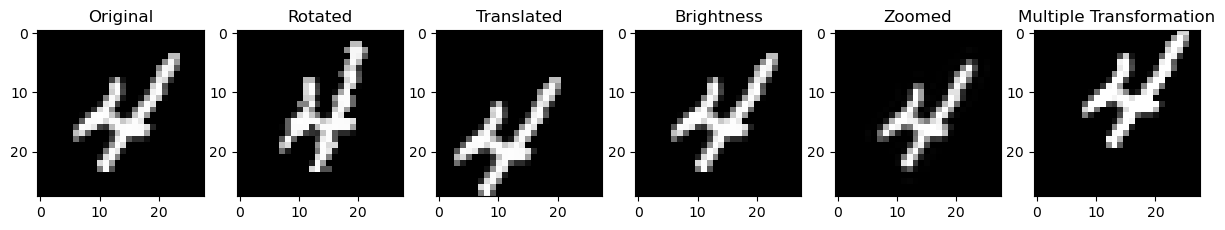

In [79]:
fig, ax = plt.subplots(1, 6, figsize=(15, 3))

original_img = (train_images[i] * 255).astype(np.uint8).reshape(28, 28)
ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original')

pil_image = Image.fromarray(original_img)
ax[1].imshow(random_rotate(pil_image, 15), cmap='gray')
ax[1].set_title('Rotated')
ax[2].imshow(random_translate(pil_image), cmap='gray')
ax[2].set_title('Translated')
ax[3].imshow(random_brightness(pil_image), cmap='gray')
ax[3].set_title('Brightness')
ax[4].imshow(random_zoom(pil_image), cmap='gray')
ax[4].set_title('Zoomed')
ax[5].imshow(transform_image(pil_image), cmap='gray')
ax[5].set_title('Multiple Transformation')